In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import missingno as msno
import seaborn as sns
import datetime as dt
print("numpy %s" % np.__version__)
print("pandas %s" % pd.__version__)
# print("matplotlib %s" % mpl.__version__)
print("missingno %s" % msno.__version__)

numpy 1.19.2
pandas 1.2.2
missingno 0.4.2


In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
pd.set_option('display.max_colwidth', 500)
pd.set_option('display.width', 1000)

# Matplotlib rcParams

In [4]:
plt.style.reload_library()
plt.style.use(['seaborn-pastel', 'seaborn-notebook'])
plt.rcParams.update({
#     "axes.titlesize" : 20,
#     "axes.labelsize" : 17,
    "axes.grid" : True, 
    "grid.color": "lightgray",
#     "lines.linewidth" : 3,
#     "lines.markersize" : 10,
#     "xtick.labelsize" : 14,
#     "ytick.labelsize" : 14,
    "figure.autolayout": True, 
    "figure.facecolor": 'white',
    "axes.facecolor": 'white'
})

# Exploratory Data Analysis (EDA)

## Time Series
Only in Germany

In [5]:
ts = pd.read_csv("time_series_60min_singleindex.csv")
wt = pd.read_csv("weather_data.csv")

In [6]:
ts['utc_timestamp'].min()

'2014-12-31T23:00:00Z'

In [7]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50401 entries, 0 to 50400
Columns: 300 entries, utc_timestamp to UA_load_forecast_entsoe_transparency
dtypes: float64(298), object(2)
memory usage: 115.4+ MB


In [8]:
wt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350640 entries, 0 to 350639
Data columns (total 85 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   utc_timestamp                    350640 non-null  object 
 1   AT_temperature                   350640 non-null  float64
 2   AT_radiation_direct_horizontal   350640 non-null  float64
 3   AT_radiation_diffuse_horizontal  350640 non-null  float64
 4   BE_temperature                   350640 non-null  float64
 5   BE_radiation_direct_horizontal   350640 non-null  float64
 6   BE_radiation_diffuse_horizontal  350640 non-null  float64
 7   BG_temperature                   350640 non-null  float64
 8   BG_radiation_direct_horizontal   350640 non-null  float64
 9   BG_radiation_diffuse_horizontal  350640 non-null  float64
 10  CH_temperature                   350640 non-null  float64
 11  CH_radiation_direct_horizontal   350640 non-null  float64
 12  CH

In [13]:
# print(ts.columns)
# Filter only Germany (DE)
ts_de_cols = [col for col in ts.columns if 'DE' in col]
ts_de_cols.insert(0, 'utc_timestamp')
print('Number of columns relating to Germany: {}'.format(len(ts_de_cols)))
ts_de_cols

Number of columns relating to Germany: 42


['utc_timestamp',
 'DE_load_actual_entsoe_transparency',
 'DE_load_forecast_entsoe_transparency',
 'DE_solar_capacity',
 'DE_solar_generation_actual',
 'DE_solar_profile',
 'DE_wind_capacity',
 'DE_wind_generation_actual',
 'DE_wind_profile',
 'DE_wind_offshore_capacity',
 'DE_wind_offshore_generation_actual',
 'DE_wind_offshore_profile',
 'DE_wind_onshore_capacity',
 'DE_wind_onshore_generation_actual',
 'DE_wind_onshore_profile',
 'DE_50hertz_load_actual_entsoe_transparency',
 'DE_50hertz_load_forecast_entsoe_transparency',
 'DE_50hertz_solar_generation_actual',
 'DE_50hertz_wind_generation_actual',
 'DE_50hertz_wind_offshore_generation_actual',
 'DE_50hertz_wind_onshore_generation_actual',
 'DE_LU_load_actual_entsoe_transparency',
 'DE_LU_load_forecast_entsoe_transparency',
 'DE_LU_price_day_ahead',
 'DE_LU_solar_generation_actual',
 'DE_LU_wind_generation_actual',
 'DE_LU_wind_offshore_generation_actual',
 'DE_LU_wind_onshore_generation_actual',
 'DE_amprion_load_actual_entsoe_tran

In [14]:
wt_de_cols = [col for col in wt.columns if 'DE' in col]
wt_de_cols.insert(0, 'utc_timestamp')
print('Number of columns relating to Germany: {}'.format(len(wt_de_cols)))
wt[wt_de_cols].info()

Number of columns relating to Germany: 4
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350640 entries, 0 to 350639
Data columns (total 4 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   utc_timestamp                    350640 non-null  object 
 1   DE_temperature                   350640 non-null  float64
 2   DE_radiation_direct_horizontal   350640 non-null  float64
 3   DE_radiation_diffuse_horizontal  350640 non-null  float64
dtypes: float64(3), object(1)
memory usage: 10.7+ MB


In [15]:
ts_de = ts[ts_de_cols]
wt_de = wt[wt_de_cols]
de = ts_de.merge(wt_de, how='inner', on='utc_timestamp')
de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43825 entries, 0 to 43824
Data columns (total 45 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   utc_timestamp                                    43825 non-null  object 
 1   DE_load_actual_entsoe_transparency               43824 non-null  float64
 2   DE_load_forecast_entsoe_transparency             43800 non-null  float64
 3   DE_solar_capacity                                43800 non-null  float64
 4   DE_solar_generation_actual                       43721 non-null  float64
 5   DE_solar_profile                                 43696 non-null  float64
 6   DE_wind_capacity                                 43800 non-null  float64
 7   DE_wind_generation_actual                        43750 non-null  float64
 8   DE_wind_profile                                  43725 non-null  float64
 9   DE_wind_offshore_capacity   

In [16]:
# Filter out columns containing 'DE_LU'
de = de.drop(columns=[col for col in de.columns if 'DE_LU' in col])
de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43825 entries, 0 to 43824
Data columns (total 38 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   utc_timestamp                                    43825 non-null  object 
 1   DE_load_actual_entsoe_transparency               43824 non-null  float64
 2   DE_load_forecast_entsoe_transparency             43800 non-null  float64
 3   DE_solar_capacity                                43800 non-null  float64
 4   DE_solar_generation_actual                       43721 non-null  float64
 5   DE_solar_profile                                 43696 non-null  float64
 6   DE_wind_capacity                                 43800 non-null  float64
 7   DE_wind_generation_actual                        43750 non-null  float64
 8   DE_wind_profile                                  43725 non-null  float64
 9   DE_wind_offshore_capacity   

<AxesSubplot:>

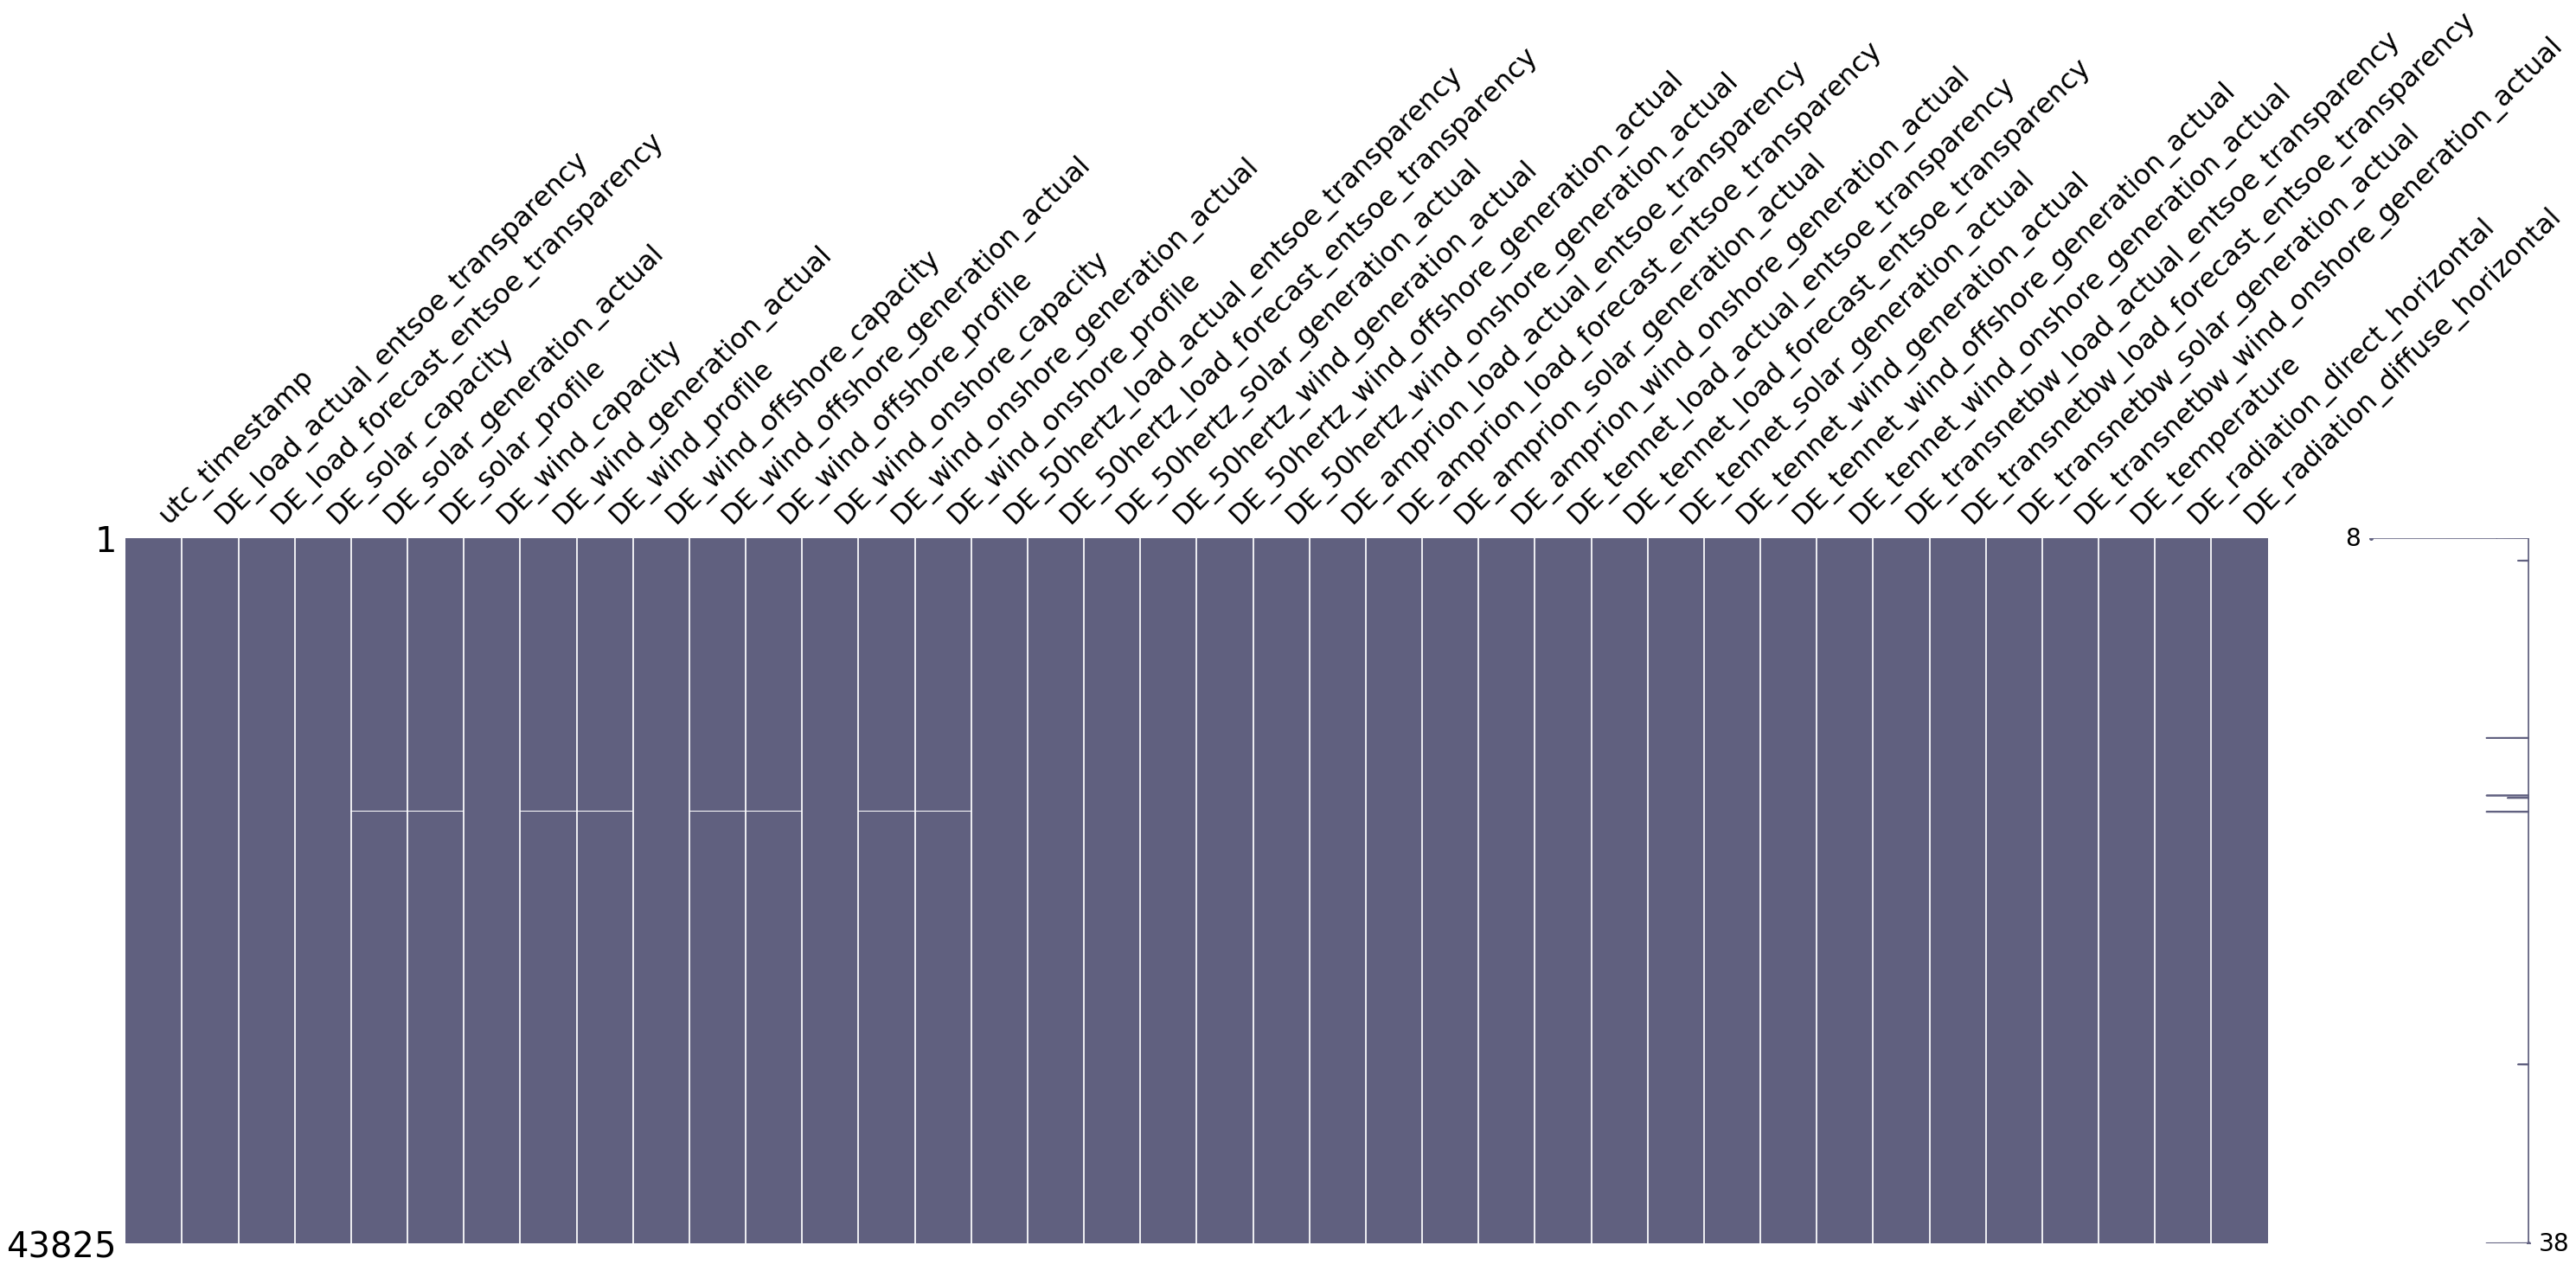

In [53]:
# plt.figure()
msno.matrix(de, figsize=(50,15), width_ratios=(12, 1), color=(0.38, 0.38, 0.5), fontsize=32)

<AxesSubplot:>

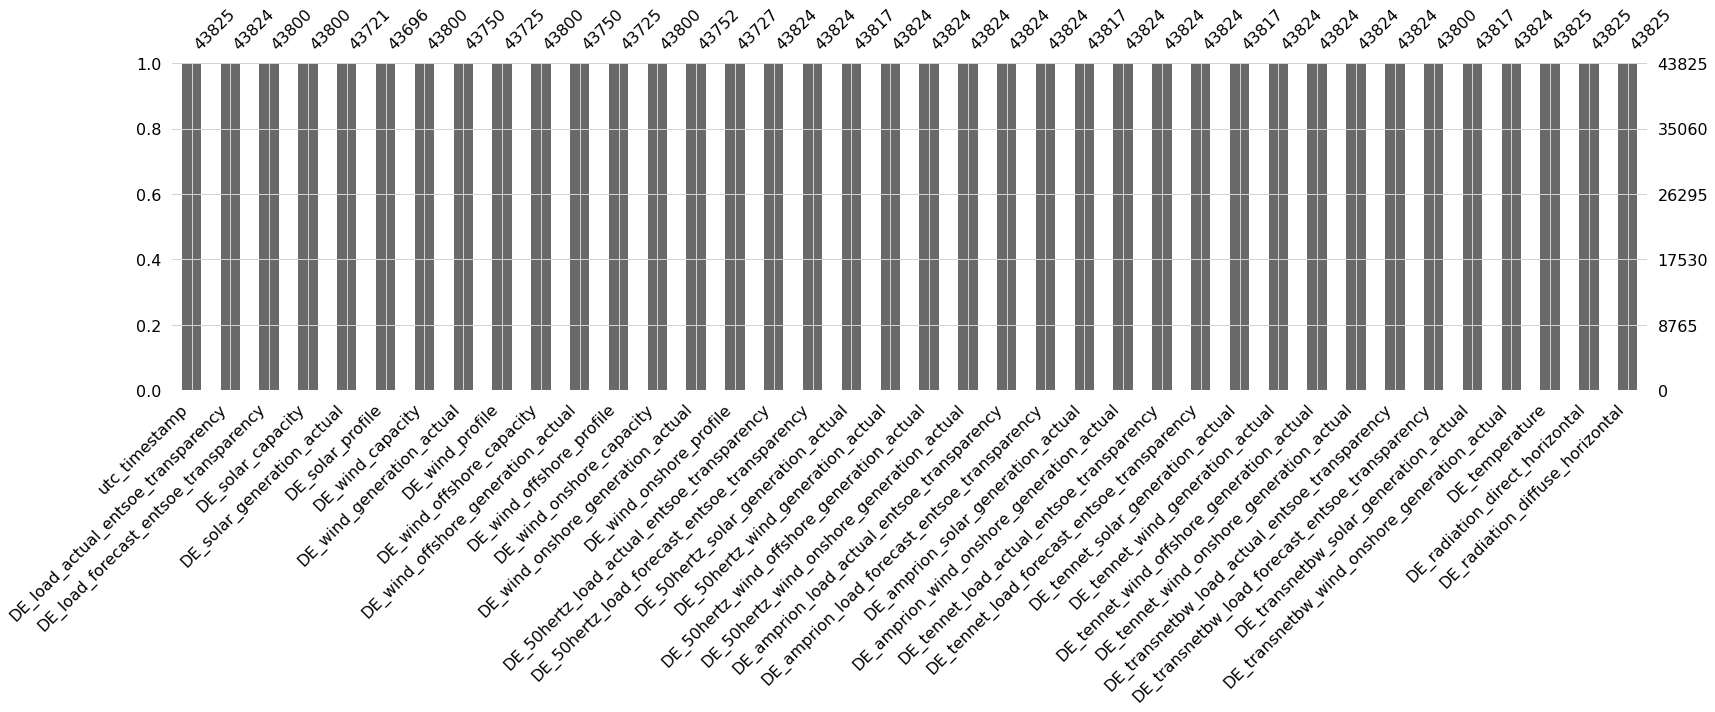

In [54]:
msno.bar(de)

In [55]:
de = de.drop(
    columns=[
        col for col in de.columns if 
        'forecast' in col or 
        'wind' in col or 
        'load' in col
    ]
)
de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43825 entries, 0 to 43824
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   utc_timestamp                          43825 non-null  object 
 1   DE_solar_capacity                      43800 non-null  float64
 2   DE_solar_generation_actual             43721 non-null  float64
 3   DE_solar_profile                       43696 non-null  float64
 4   DE_50hertz_solar_generation_actual     43817 non-null  float64
 5   DE_amprion_solar_generation_actual     43817 non-null  float64
 6   DE_tennet_solar_generation_actual      43817 non-null  float64
 7   DE_transnetbw_solar_generation_actual  43817 non-null  float64
 8   DE_temperature                         43825 non-null  float64
 9   DE_radiation_direct_horizontal         43825 non-null  float64
 10  DE_radiation_diffuse_horizontal        43825 non-null  float64
dtypes:

<AxesSubplot:>

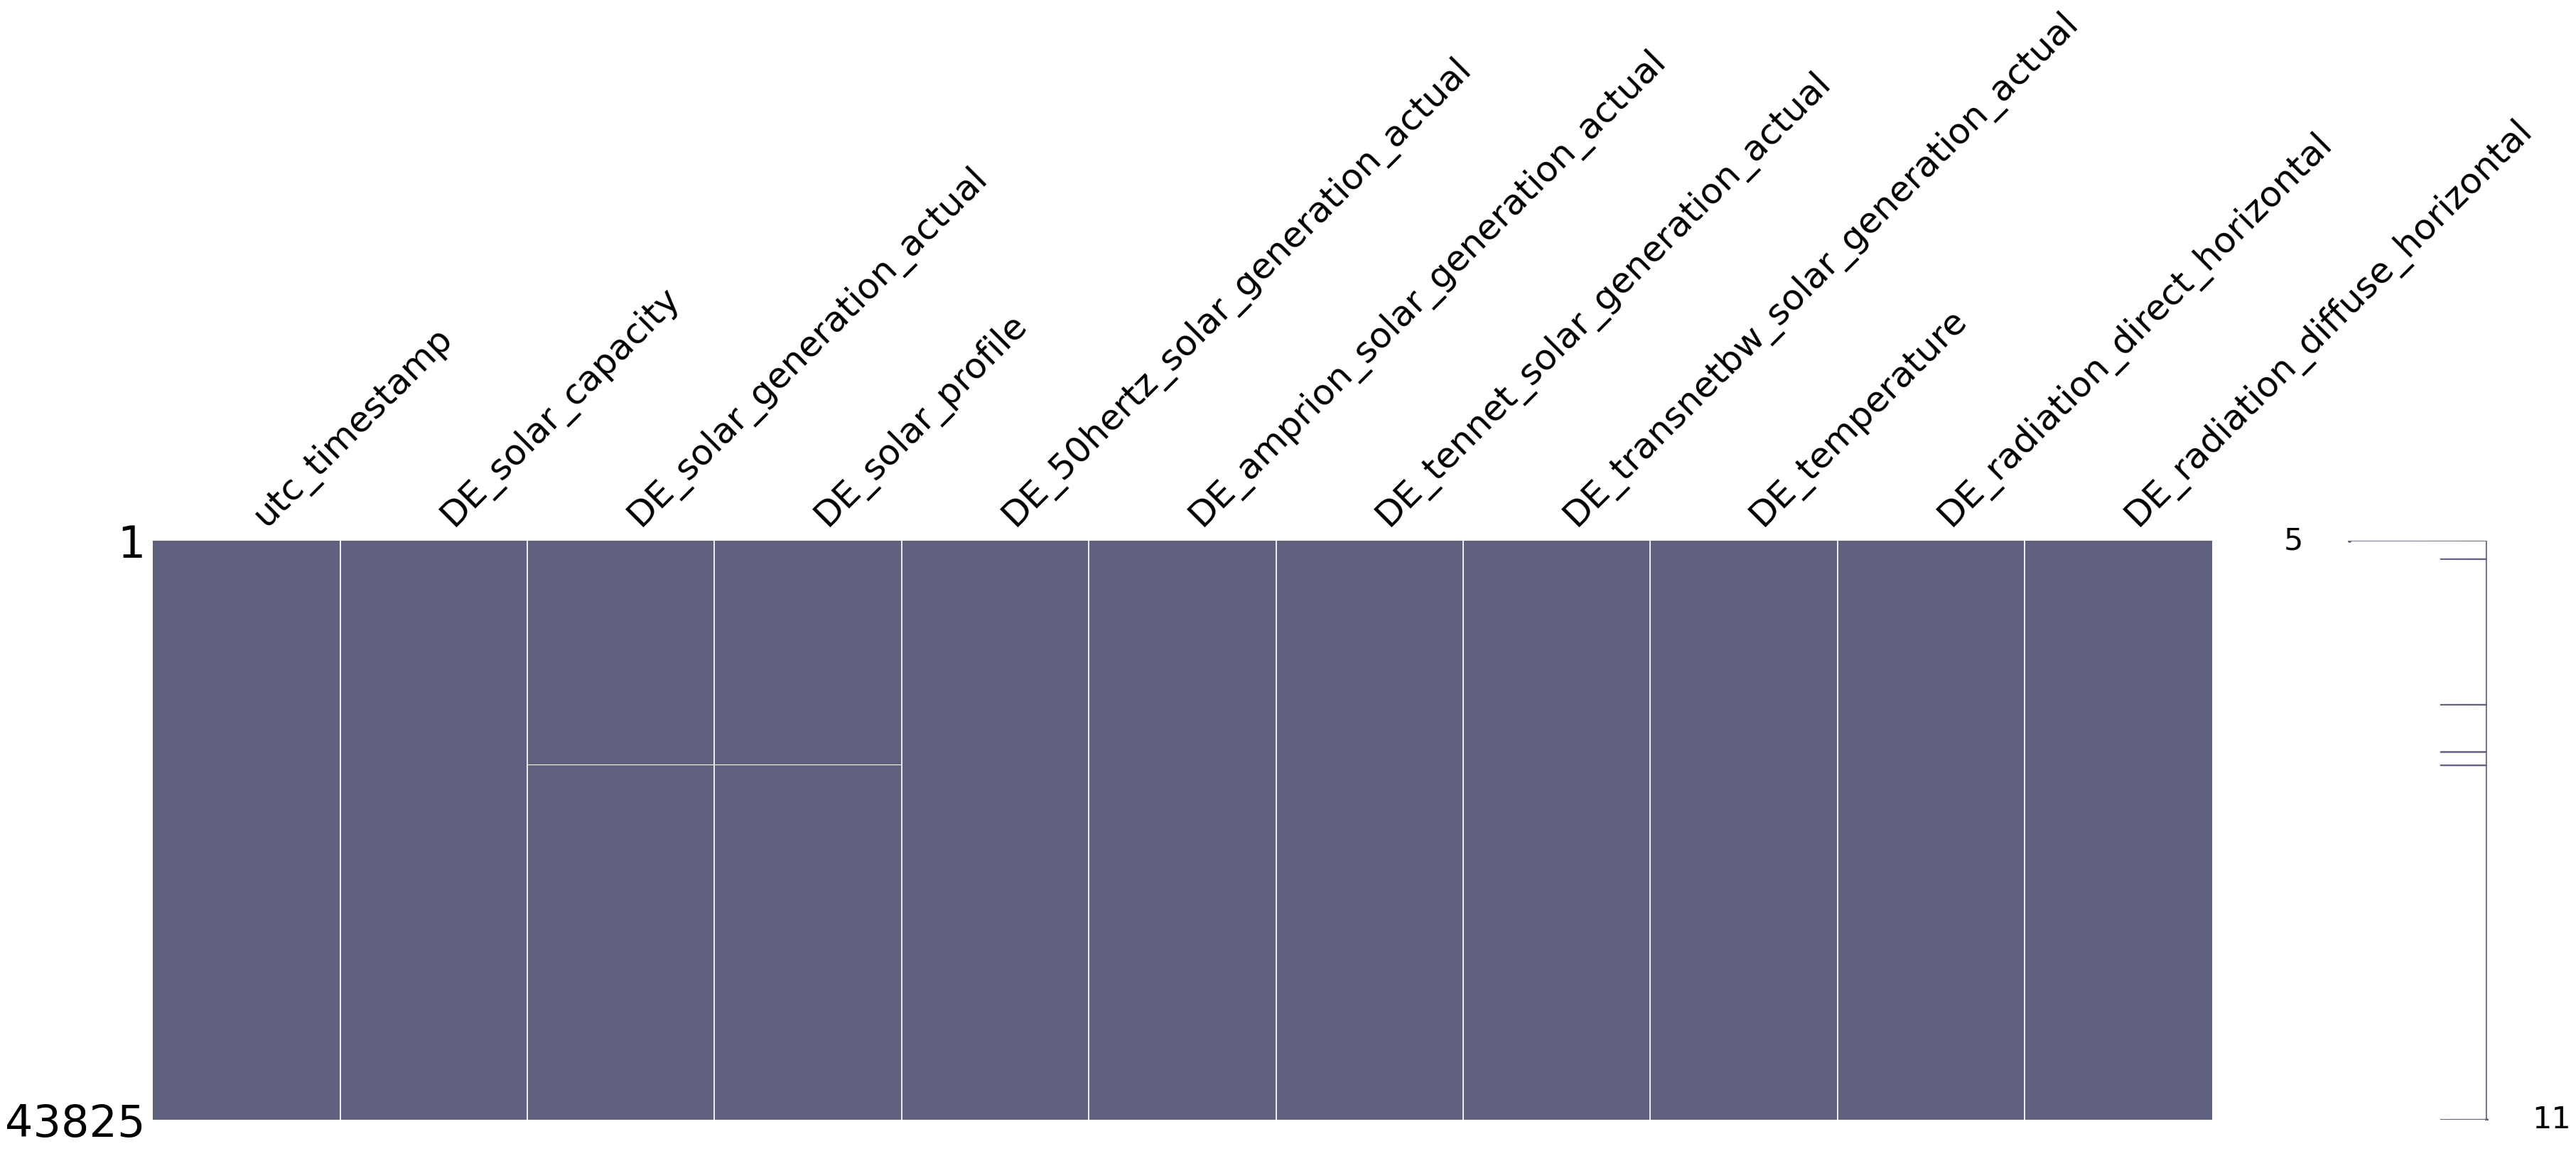

In [62]:
msno.matrix(de, figsize=(60,15), width_ratios=(9, 1), color=(0.38, 0.38, 0.5), fontsize=50)

In [18]:
de.describe()

,DE_solar_capacity,DE_solar_generation_actual,DE_solar_profile,DE_50hertz_solar_generation_actual,DE_amprion_solar_generation_actual,DE_tennet_solar_generation_actual,DE_transnetbw_solar_generation_actual,DE_temperature,DE_radiation_direct_horizontal,DE_radiation_diffuse_horizontal
count,43800.000000,43721.000000,43696.000000,43817.000000,43817.000000,43817.000000,43817.000000,43825.000000,43825.000000,43825.000000
mean,42378.015114,4304.566318,0.101902,1095.866308,998.543670,1597.470069,608.913139,9.850472,82.748991,67.072165
std,4306.391773,6603.857970,0.155718,1731.814633,1546.708047,2479.432498,954.399754,8.130307,158.997996,89.173543
min,37248.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-12.686000,0.000000,0.000000
25%,38810.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.261000,0.000000,0.000000
50%,40941.000000,126.000000,0.003000,32.000000,27.000000,41.000000,12.000000,9.237000,0.422000,6.321500
75%,46092.000000,6822.000000,0.162300,1664.000000,1560.000000,2489.000000,927.000000,16.027000,79.193800,119.513900
max,50508.000000,30028.000000,0.687300,7990.000000,6981.000000,11755.000000,4092.000000,35.479000,841.681000,392.089500


### Distribution

In [19]:
de.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43825 entries, 0 to 43824
Data columns (total 11 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   utc_timestamp                          43825 non-null  object 
 1   DE_solar_capacity                      43800 non-null  float64
 2   DE_solar_generation_actual             43721 non-null  float64
 3   DE_solar_profile                       43696 non-null  float64
 4   DE_50hertz_solar_generation_actual     43817 non-null  float64
 5   DE_amprion_solar_generation_actual     43817 non-null  float64
 6   DE_tennet_solar_generation_actual      43817 non-null  float64
 7   DE_transnetbw_solar_generation_actual  43817 non-null  float64
 8   DE_temperature                         43825 non-null  float64
 9   DE_radiation_direct_horizontal         43825 non-null  float64
 10  DE_radiation_diffuse_horizontal        43825 non-null  float64
dtypes:

In [20]:
import datetime as dt
de['utc_timestamp'] = de['utc_timestamp'].apply(lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))

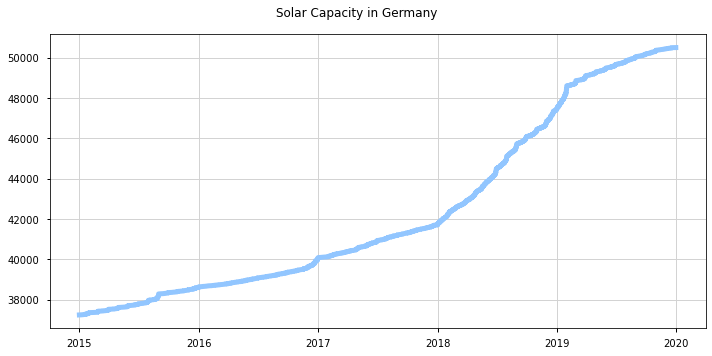

In [21]:
BINS = 50
plt.figure(figsize=(10,5))
plt.suptitle('Solar Capacity in Germany')
# plt.plot(de['DE_solar_capacity'].groupby(de['utc_timestamp'].dt.date).agg('max'), linewidth=5)
plt.plot(de['DE_solar_capacity'].groupby(de['utc_timestamp']).agg('max'), linewidth=5)
plt.show()

In [22]:
# plt.figure(figsize=(20,10))
# plt.suptitle('Total Solar Generation in Germany')
# plt.plot(de['DE_solar_generation_actual'].groupby(de['utc_timestamp']).agg(max))
# plt.show()

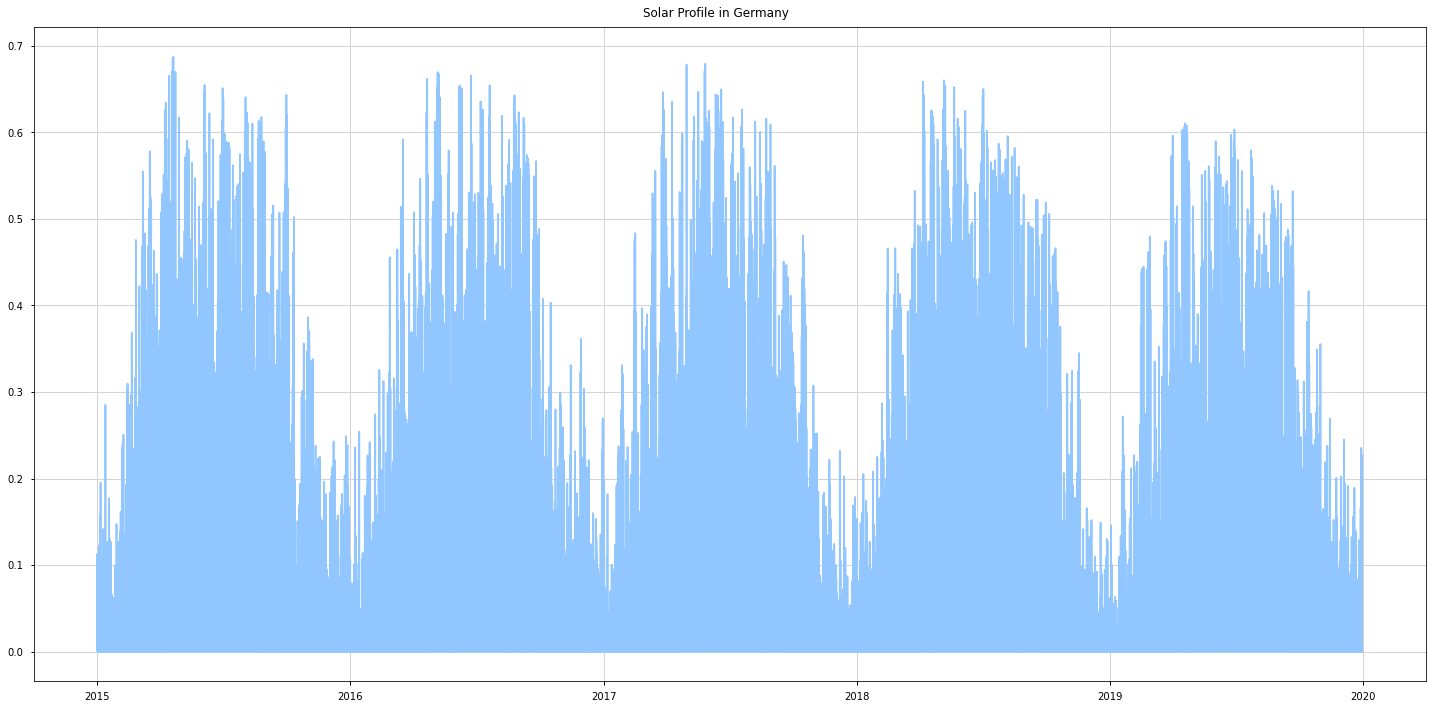

In [23]:
plt.figure(figsize=(20,10))
plt.suptitle('Solar Profile in Germany')
plt.plot(de['DE_solar_profile'].groupby(de['utc_timestamp']).agg(max))
plt.show()

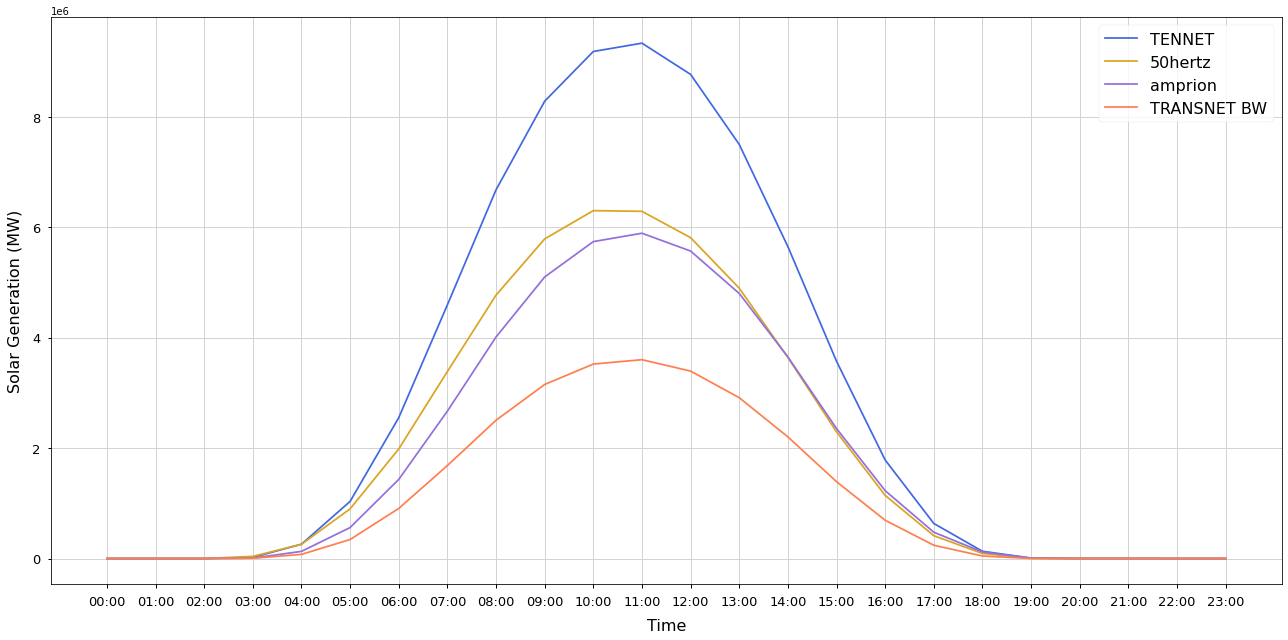

In [24]:
de['DE_tennet_solar_generation_actual'].groupby(de['utc_timestamp'].dt.time).agg('sum').plot(kind='line', figsize=(18,9), c='royalblue')
de['DE_50hertz_solar_generation_actual'].groupby(de['utc_timestamp'].dt.time).agg('sum').plot(kind='line', figsize=(18,9), c='goldenrod')
de['DE_amprion_solar_generation_actual'].groupby(de['utc_timestamp'].dt.time).agg('sum').plot(kind='line', figsize=(18,9), c='mediumpurple')
de['DE_transnetbw_solar_generation_actual'].groupby(de['utc_timestamp'].dt.time).agg('sum').plot(kind='line', figsize=(18,9), c='coral')
plt.xlabel('Time', labelpad=10, fontsize=16)
plt.ylabel('Solar Generation (MW)', labelpad=10, fontsize=16)
plt.xticks(de['utc_timestamp'].dt.time.unique(), fontsize=13)
plt.yticks(fontsize=13)
plt.legend(['TENNET', '50hertz', 'amprion', 'TRANSNET BW'], fontsize=16)

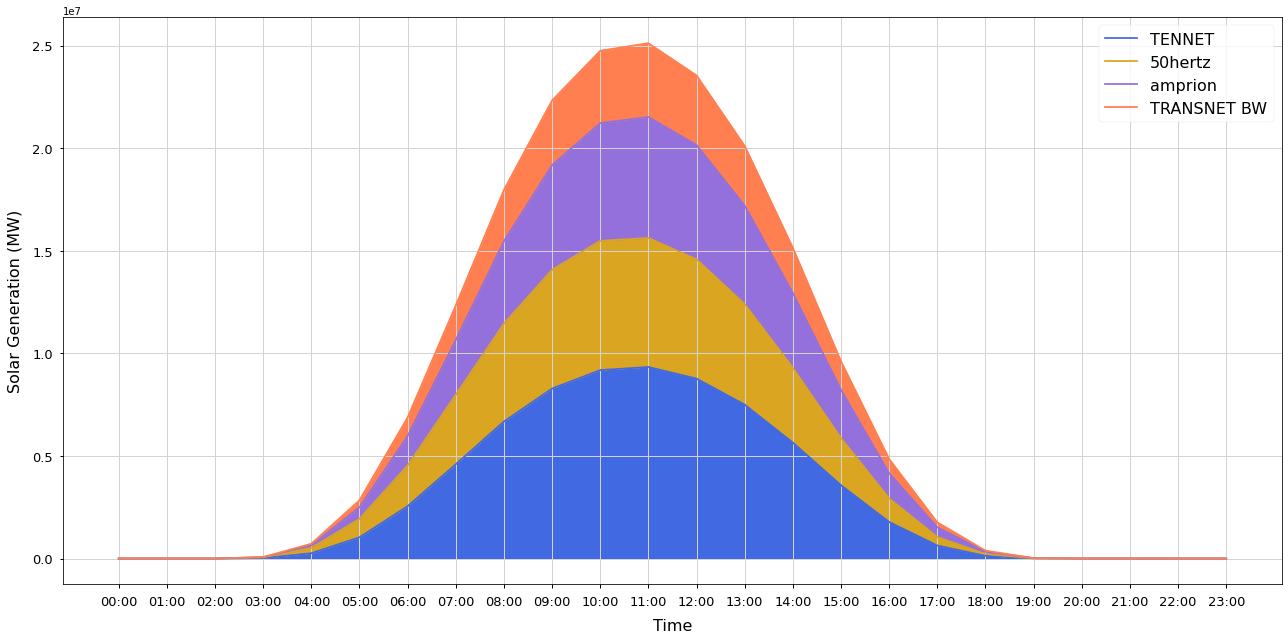

In [163]:
de[[
    'DE_tennet_solar_generation_actual',
    'DE_50hertz_solar_generation_actual',
    'DE_amprion_solar_generation_actual',
    'DE_transnetbw_solar_generation_actual'
]].groupby(de['utc_timestamp'].dt.time).agg('sum').plot.area(figsize=(18,9), color=['royalblue', 'goldenrod', 'mediumpurple', 'coral'])
plt.xlabel('Time', labelpad=10, fontsize=16)
plt.ylabel('Solar Generation (MW)', labelpad=10, fontsize=16)
plt.xticks(de['utc_timestamp'].dt.time.unique(), fontsize=13)
plt.yticks(fontsize=13)
plt.legend(['TENNET', '50hertz', 'amprion', 'TRANSNET BW'], fontsize=16)

<AxesSubplot:>

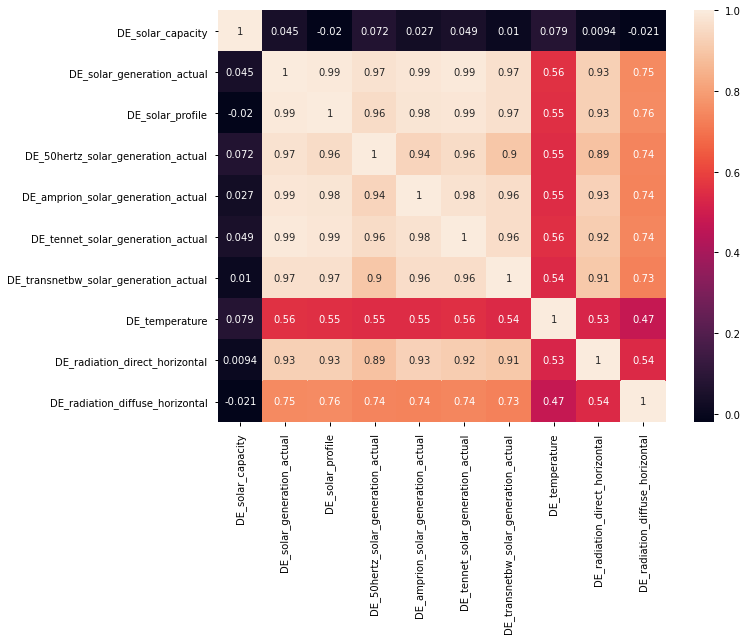

In [76]:
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(de.corr(), annot=True)

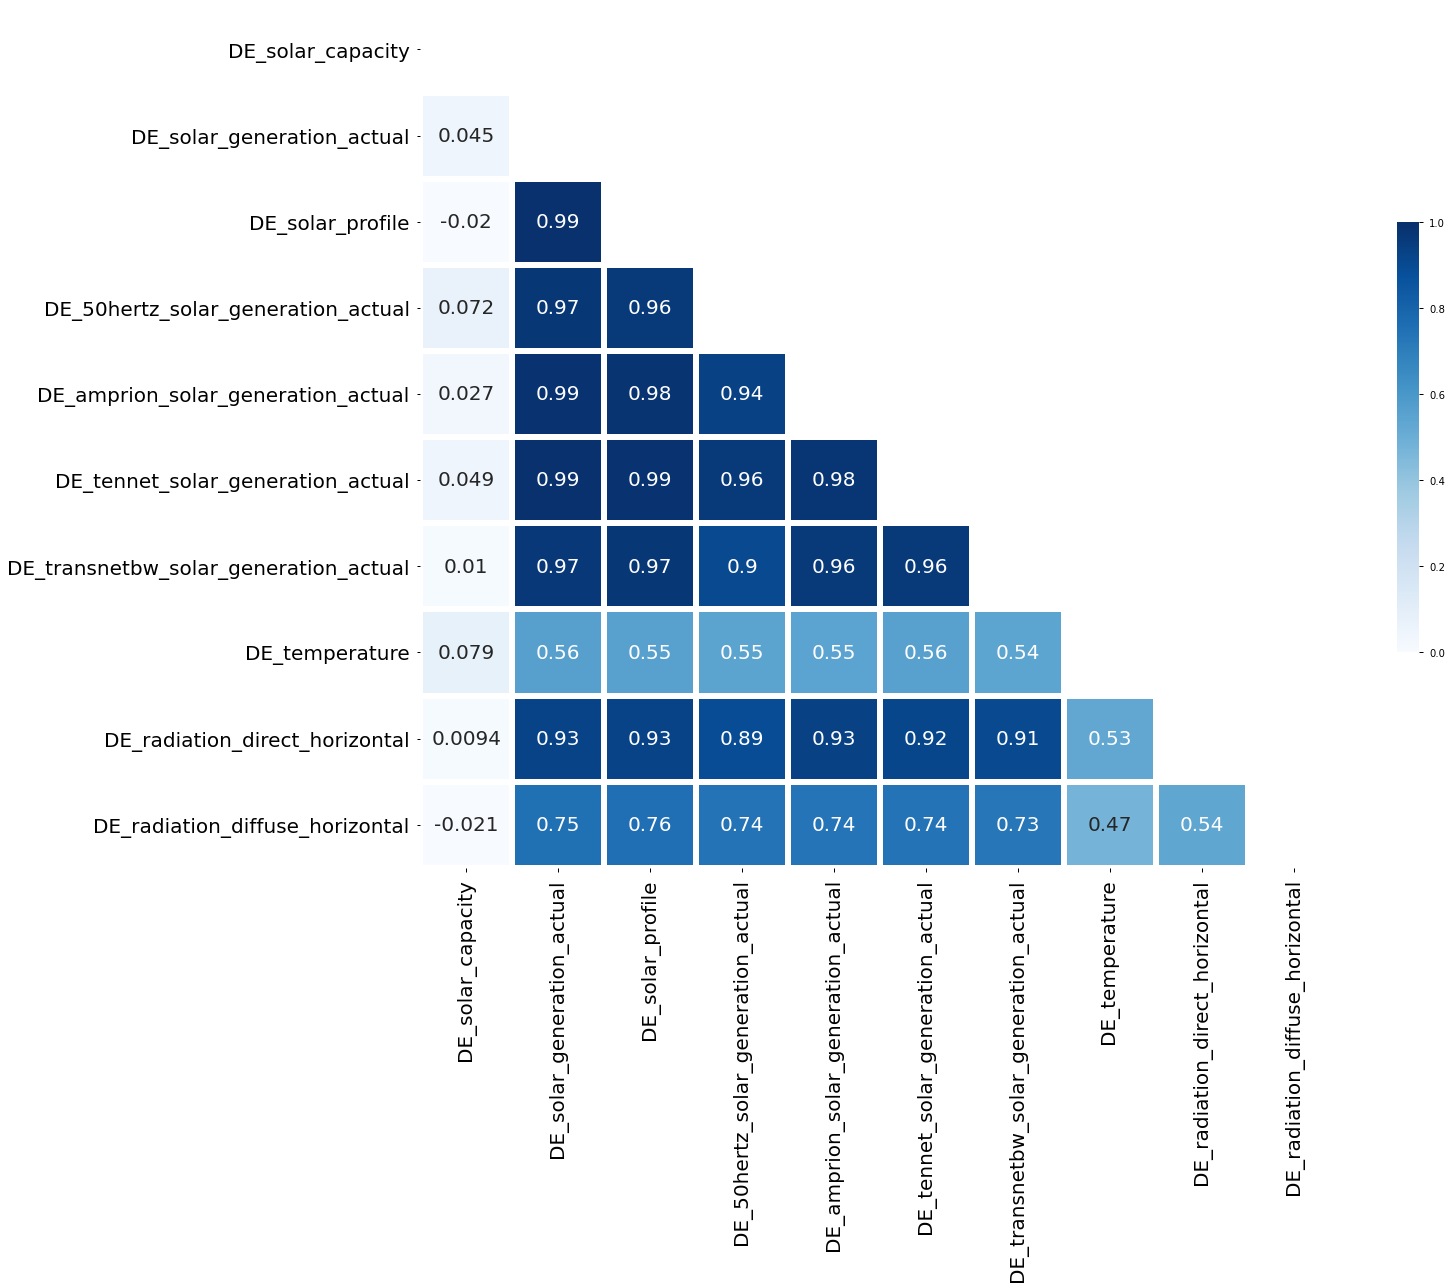

In [70]:
# Compute the correlation matrix
corr = de.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(22, 18))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(0, 180, s=90, l=50, n=9*8, as_cmap=True)
# cmap = sns.color_palette("crest", as_cmap=True)
cmap = sns.color_palette("Blues", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=0, center=0.5,
            square=True, linewidths=5, cbar_kws={"shrink": .50}, annot=True, annot_kws={"size": 20})
g.set_xticklabels(g.get_xmajorticklabels(), fontsize = 20)
g.set_yticklabels(g.get_ymajorticklabels(), fontsize = 20)
plt.show()

---

### Two-var

#### Boxplots


In [ ]:
de[[
    
]]